### 사전준비

In [1]:
# 기본적인 패키지 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 / 차트 마이너스
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='NanumSquare')
sns.set(font='NanumSquare', rc={'axes.unicode_minus':False}, style='darkgrid')  # 여기서 컬러 조정

### MNIST 다운로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [12]:
# MNIST 이미지 표현
def show_images(dataset, label, nrow, ncol):
    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol, 2*nrow))
    ax = axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):
        image = dataset[i]
        ax[i].imshow(image, cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()

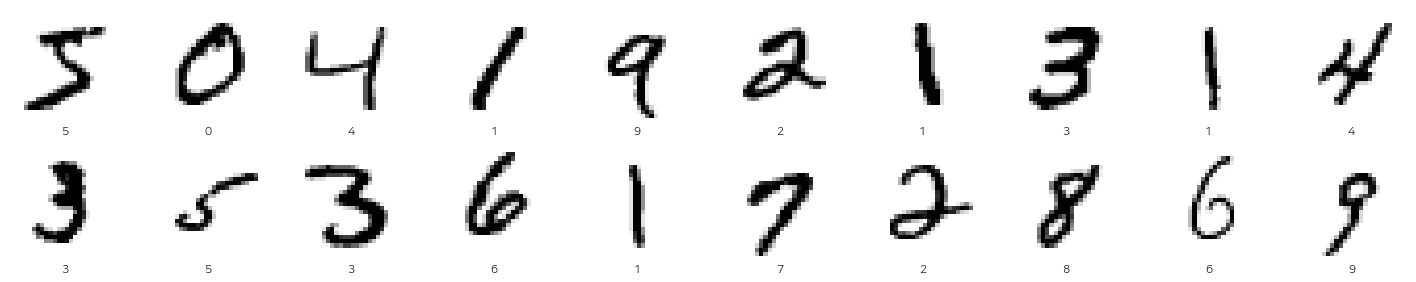

In [13]:
show_images(train_input, train_target, 2, 10)

In [15]:
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 1000)              785000    
                                                                 
 output (Dense)              (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 255.0 나눠서 0~1로 값 축소하는 일은 안 함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/ann_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target),
                                               batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
600/600 [==============================] - ETA: 0s - loss: 4.2141 - accuracy: 0.9164
Epoch 1: val_loss improved from inf to 0.85863, saving model to ../data\ann_model.h5
600/600 [==============================] - 4s 6ms/step - loss: 4.2141 - accuracy: 0.9164 - val_loss: 0.8586 - val_accuracy: 0.9467
Epoch 2/20
594/600 [============================>.] - ETA: 0s - loss: 0.4562 - accuracy: 0.9615
Epoch 2: val_loss improved from 0.85863 to 0.47657, saving model to ../data\ann_model.h5
600/600 [==============================] - 4s 6ms/step - loss: 0.4569 - accuracy: 0.9614 - val_loss: 0.4766 - val_accuracy: 0.9585
Epoch 3/20
600/600 [==============================] - ETA: 0s - loss: 0.2590 - accuracy: 0.9684
Epoch 3: val_loss improved from 0.47657 to 0.36395, saving model to ../data\ann_model.h5
600/600 [==============================] - 3s 5ms/step - loss: 0.2590 - accuracy: 0.9684 - val_loss: 0.3640 - val_accuracy: 0.9610
Epoch 4/20
594/600 [============================>.] - ET

In [33]:
# 드랍아웃 추가
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/ann_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target),
                                               batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
598/600 [============================>.] - ETA: 0s - loss: 4.6282 - accuracy: 0.8976
Epoch 1: val_loss improved from inf to 0.43162, saving model to ../data\ann_model.h5
600/600 [==============================] - 4s 6ms/step - loss: 4.6147 - accuracy: 0.8978 - val_loss: 0.4316 - val_accuracy: 0.9449
Epoch 2/20
597/600 [============================>.] - ETA: 0s - loss: 0.4551 - accuracy: 0.9303
Epoch 2: val_loss improved from 0.43162 to 0.31489, saving model to ../data\ann_model.h5
600/600 [==============================] - 4s 6ms/step - loss: 0.4555 - accuracy: 0.9302 - val_loss: 0.3149 - val_accuracy: 0.9529
Epoch 3/20
596/600 [============================>.] - ETA: 0s - loss: 0.3215 - accuracy: 0.9399
Epoch 3: val_loss did not improve from 0.31489
600/600 [==============================] - 4s 6ms/step - loss: 0.3226 - accuracy: 0.9398 - val_loss: 0.3254 - val_accuracy: 0.9482
Epoch 4/20
598/600 [============================>.] - ETA: 0s - loss: 0.2977 - accuracy: 0.9421
Ep

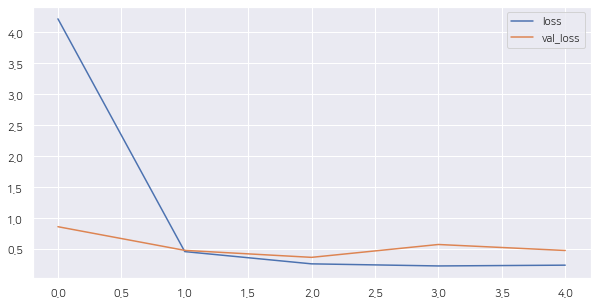

In [18]:
plot_target = ['loss', 'val_loss']
plt.figure(figsize=(10, 5))

for each in plot_target:
    plt.plot(history.history[each], label=each)

plt.legend()
plt.show()

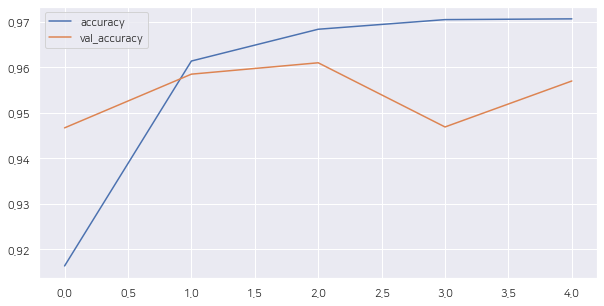

In [19]:
plot_target = ['accuracy', 'val_accuracy']
plt.figure(figsize=(10, 5))

for each in plot_target:
    plt.plot(history.history[each], label=each)

plt.legend()
plt.show()

In [20]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.9610


[0.3639535903930664, 0.9610000252723694]

In [21]:
# 예측된 결과값 리스트
pred_result = model.predict(test_input)

313/313 [==============================] - 1s 2ms/step


In [24]:
pred_labels = np.argmax(pred_result, axis=-1)
pred_labels[:10]
# pred_labels.shape

(10000,)

##### 예측에 실패한 이미지 파악

In [25]:
wrong_result = []

for i in range(0, len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)

len(wrong_result)

390

In [26]:
import random

In [28]:
samples = random.choices(population=wrong_result, k=16)
len(samples)

16

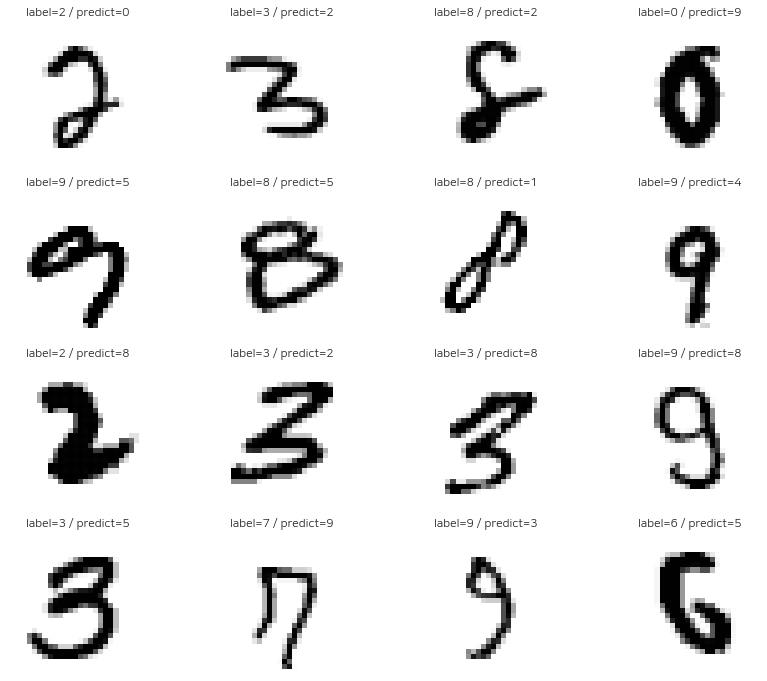

In [31]:
# 예측에 실패한 이미지 확인
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(test_input[n].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    plt.title(f'label={test_target[n]} / predict={pred_labels[n]}')
    plt.axis('off')

plt.show()